<a href="https://colab.research.google.com/github/jessedso99/sql-python-files/blob/main/Termoestat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
from numpy.core.fromnumeric import mean

In [ ]:
# qntQq1 = int(input("Digite a qnt de ÁTOMOS de Q1: "))
# qntQq2 = int(input("Digite a qnt de ÁTOMOS de Q2: "))
# qntQtotal = int(qntQq1+qntQq2)

#resetar os dados de q1 e q2 e obter um qtotal
qntQq1 = int(0)
qntQq2 = int(0)

qntQtotal = int(input("Digite a quantidade total de QUANTAS: "))

qntOsc1 = int(input("Digite a qnt de OSCILADORES de Q1: "))
qntOsc2 = int(input("Digite a qnt de OSCILADORES de Q2: "))
qntOscTotal = qntOsc1+qntOsc2

#através dos números de osciladores, distribuir q1 e q2
qntQq1 = qntQtotal/((qntOsc2/qntOsc1)+1)
qntQq2 = qntQtotal - qntQq1

qTotal = float(np.math.factorial(qntQtotal+ qntOscTotal- 1)/(np.math.factorial(qntQtotal)*np.math.factorial(qntOscTotal-1)))

Digite a quantidade total de QUANTAS: 4
Digite a qnt de OSCILADORES de Q1: 3
Digite a qnt de OSCILADORES de Q2: 3


In [ ]:
q1 = []
q2 = []
omega1 = []
omega2 = []
omega0 = []

for n in range(0, qntQtotal+1):
  q1.append(n)

for n in range(qntQtotal, -1, -1):
  q2.append(n)

for n in range(0, len(q1)):
  omega1.append(int(np.math.factorial((q1[n])+ qntOsc1- 1)/(np.math.factorial((q1[n]))*np.math.factorial(qntOsc1-1))))

for n in range(0, len(q2)):
  omega2.append(int(np.math.factorial((q2[n])+ qntOsc2- 1)/(np.math.factorial((q2[n]))*np.math.factorial(qntOsc2-1))))

for n in range(0, len(q1)):
  omega0.append(omega1[n]*omega2[n])


In [ ]:
dados = {"q1": q1, "q2": q2, "Ω1": omega1, "Ω2": omega2, "Ω": omega0}
dfDados = pd.DataFrame(dados)
print(dfDados)

   q1  q2  Ω1  Ω2   Ω
0   0   4   1  15  15
1   1   3   3  10  30
2   2   2   6   6  36
3   3   1  10   3  30
4   4   0  15   1  15


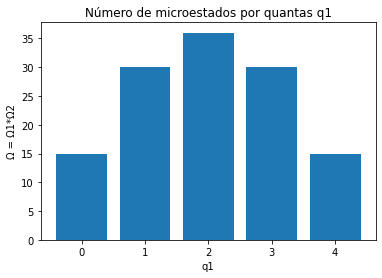

In [ ]:
#dfDados["Ω"].plot.bar();
#plt.title("Número de microestados por quantas q1");
#plt.xlabel("q1");
#plt.ylabel("Ω = Ω1*Ω2");

plt.title("Número de microestados por quantas q1")
plt.xlabel("q1");
plt.ylabel("Ω = Ω1*Ω2");
plt.bar(q1, omega0)
plt.show()


In [ ]:
#qTotal
omega0_qTotal = []

for n in range(0, len(q1)):
  omega0_qTotal.append(omega0[n]/qTotal)

In [ ]:
#anlises statisc
Qtotal = {"q1": q1, "q2": q2, "Ω1*Ω2/Qtotal": omega0_qTotal}
dfQtotal = pd.DataFrame(Qtotal)

dfLarg = dfQtotal[["q1", "Ω1*Ω2/Qtotal"]].loc[(dfQtotal["Ω1*Ω2/Qtotal"] >= max(omega0_qTotal)/2)]

larg = max(dfLarg["q1"]) - min(dfLarg["q1"])

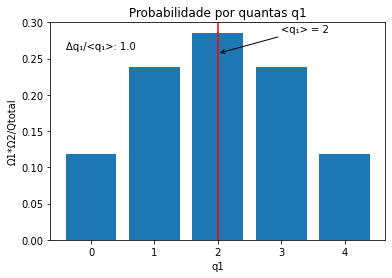

In [ ]:
plt.title("Probabilidade por quantas q1");
plt.xlabel("q1");
plt.ylabel("Ω1*Ω2/Qtotal");
plt.bar(q1, omega0_qTotal)

#plot reta média, valor mais provavel

plt.axvline(x = np.argmax(omega0_qTotal), color = 'r', label = 'axvline - full height')
analis = larg / np.argmax(omega0_qTotal)

def get_sub(x): 
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s), ''.join(super_s)) 
    return x.translate(res) 

plt.text(min(q1)-0.1*max(q1), (23*max(omega0_qTotal)/25), "\u0394q{}/<q{}>: ".format(get_sub('1'),get_sub('1'))+str(analis))

plt.annotate("<q{}> = ".format(get_sub('1'))+str(np.argmax(omega0_qTotal)), 
           xytext=(np.argmax(omega0_qTotal)+0.5*np.argmax(omega0_qTotal), max(omega0_qTotal)+0.001*max(omega0_qTotal)),
           xycoords='data',
           xy=(np.argmax(omega0_qTotal), max(omega0_qTotal)-0.1*max(omega0_qTotal)),
           textcoords='data',
           arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.show()
